<a href="https://colab.research.google.com/github/Amr789/FaceAnalysis-System/blob/main/demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 1. Clone repository (or pull updates if it exists)
import os
if not os.path.exists("FaceAnalysis-System"):
    !git clone https://github.com/Amr789/FaceAnalysis-System.git
else:
    %cd FaceAnalysis-System
    !git pull

# 2. Enter the directory
if os.getcwd().split('/')[-1] != "FaceAnalysis-System":
    %cd FaceAnalysis-System

# 3. Install dependencies
print("Installing dependencies...")
!pip install -r requirements.txt -q

# 4. Mount Google Drive (To save your trained model)
from google.colab import drive
drive.mount('/content/drive')

Cloning into 'FaceAnalysis-System'...
remote: Enumerating objects: 25, done.
remote: Counting objects: 100% (25/25), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 25 (delta 7), reused 25 (delta 7), pack-reused 0 (from 0)
Receiving objects: 100% (25/25), 8.99 KiB | 8.99 MiB/s, done.
Resolving deltas: 100% (7/7), done.
/content/FaceAnalysis-System
Installing dependencies...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 80.0 MB/s eta 0:00:00
Mounted at /content/drive


In [2]:
# Upload your kaggle.json when prompted
from google.colab import files
import os

if not os.path.exists("kaggle.json"):
    print("Please upload your kaggle.json file:")
    files.upload()

# Use the new main entry point to handle setup and download
!python main.py --mode setup

Please upload your kaggle.json file:


Saving kaggle.json to kaggle.json
🚀 Starting Project Setup...
Created directory: /root/.kaggle
✅ kaggle.json installed and permissions set.
⬇️ Downloading UTKFace dataset...
Dataset URL: https://www.kaggle.com/datasets/jangedoo/utkface-new
License(s): copyright-authors
 93% 307M/331M [00:00<00:00, 837MB/s] 
100% 331M/331M [00:00<00:00, 784MB/s]
✅ Download and extraction complete! Data is in 'data/' folder.


In [4]:
!git pull

remote: Enumerating objects: 5, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (1/1), done.
remote: Total 3 (delta 2), reused 3 (delta 2), pack-reused 0 (from 0)
Unpacking objects: 100% (3/3), 466 bytes | 466.00 KiB/s, done.
From https://github.com/Amr789/FaceAnalysis-System
   4d9d1d0..dc7a52e  main       -> origin/main
Updating 4d9d1d0..dc7a52e
Fast-forward
 main.py | 9 ++++++++-
 1 file changed, 8 insertions(+), 1 deletion(-)


In [5]:
# Run training using the main entry point
!python main.py --mode train --epochs 1 --batch 32

📂 Created directory: models
🏋️‍♀️ Starting Training for 1 epochs...
Training on cuda
/usr/local/lib/python3.12/dist-packages/albumentations/core/validation.py:114: UserWarning: ShiftScaleRotate is a special case of Affine transform. Please use Affine transform instead.
  original_init(self, **validated_kwargs)
⚖️ Computing age weights to fix imbalance...
Epoch 1 | Train Weighted Loss: 0.53 | Val MAE: 11.23
--> Saved better model to models/utk_age_model.pth


Initializing pipeline on: cuda
✅ Loaded EfficientNet age model.
Upload 2 images to compare:


Saving old_brad_pitt.jpg to old_brad_pitt (3).jpg
Saving young_brad_pitt.jpg to young_brad_pitt (3).jpg


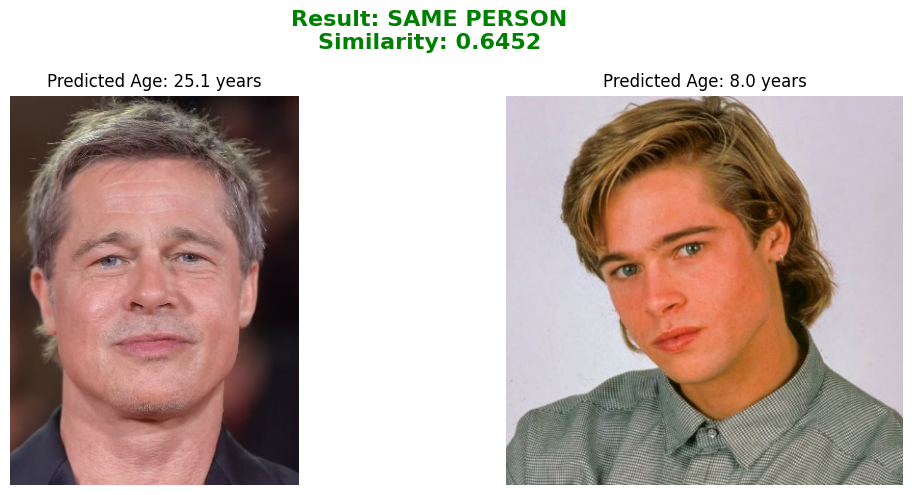

📊 Full Data: {'age_1': 25.1, 'age_2': 8.0, 'similarity': 0.6452, 'match': True}


In [9]:
import matplotlib.pyplot as plt
import cv2
from src.inference import UTKFacePipeline
from google.colab import files

# Initialize pipeline (Loads EfficientNet weights)
pipeline = UTKFacePipeline(age_model_path="models/utk_age_model.pth")

# Upload images
print("Upload 2 images to compare:")
uploaded = files.upload()
paths = list(uploaded.keys())

if len(paths) >= 2:
    # 1. Run Inference
    result = pipeline.compare(paths[0], paths[1])

    # 2. Setup Visualization
    # Load images (OpenCV loads in BGR, so we convert to RGB for Matplotlib)
    img1 = cv2.cvtColor(cv2.imread(paths[0]), cv2.COLOR_BGR2RGB)
    img2 = cv2.cvtColor(cv2.imread(paths[1]), cv2.COLOR_BGR2RGB)

    # Create the plot
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))

    # --- Left Image ---
    ax[0].imshow(img1)
    ax[0].set_title(f"Predicted Age: {result['age_1']} years", fontsize=12)
    ax[0].axis('off')

    # --- Right Image ---
    ax[1].imshow(img2)
    ax[1].set_title(f"Predicted Age: {result['age_2']} years", fontsize=12)
    ax[1].axis('off')

    # --- Main Header (The Green/Red Result) ---
    match_text = "SAME PERSON" if result['match'] else "DIFFERENT PEOPLE"
    match_color = "green" if result['match'] else "red"

    plt.suptitle(f"Result: {match_text}\nSimilarity: {result['similarity']}",
                 fontsize=16, fontweight='bold', color=match_color)

    # Show the plot
    plt.tight_layout()
    plt.show()

    # 3. Print the Raw Data (Footer)
    print(f"📊 Full Data: {result}")
else:
    print("⚠️ Please upload at least 2 images.")